In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

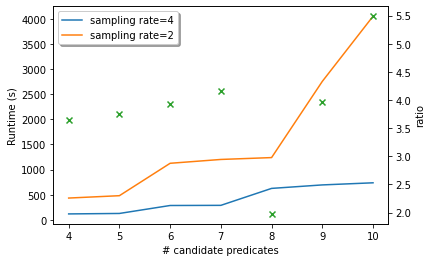

In [2]:
# Varying the number of candidate predicates 
# "Far_3(o0, o1); Conjunction(Conjunction(Near_1(o0, o1), LeftQuadrant(o0)), Behind(o0, o1))"
# sampling_rate 4
# lru capacity 10000: number of queries cached for each data point
# fix random seed
time_sr_4 = np.array([119.28026676177979, 128.44779777526855, 286.64369010925293, 
        289.5237400531769, 626.5141546726227, 695.7426767349243, 737.8011164665222])
time_sr_2 = np.array([434.6194019317627, 481.4771044254303, 1125.6676540374756, 1201.8710186481476,
             1238.9575731754303, 2753.653774499893, 4048.5665769577026])
ratio = time_sr_2 / time_sr_4
n_candidate_pred = [4, 5, 6, 7, 8, 9, 10]
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(n_candidate_pred, time_sr_4, label="sampling rate=4")
ax.plot(n_candidate_pred, time_sr_2, label="sampling rate=2")
ax2.scatter(n_candidate_pred, ratio, marker="x", color="tab:green")
ax.set(xlabel="# candidate predicates", ylabel="Runtime (s)")
ax2.set_ylabel("ratio")
ax.legend(prop={"size":10}, loc='upper left', fancybox=True, shadow=True)

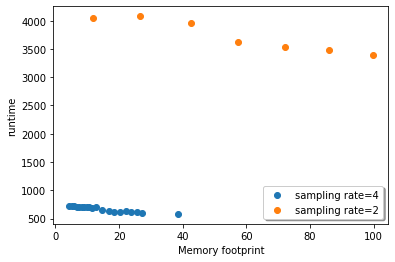

In [4]:
# Varying the capacity of LRU dict
# "Far_3(o0, o1); Conjunction(Conjunction(Near_1(o0, o1), LeftQuadrant(o0)), Behind(o0, o1))"
# sampling_rate 4
# candidate predicates 10
# fix random seed
# cap = [None, 100,000-10,000, 360,000-120,000]
time_sr_4 = [581.1236283779144, 682.3239893913269, 701.701934337616, 
        710.6559112071991, 705.6707134246826, 700.9531826972961, 
        704.1981172561646, 707.5624577999115, 712.657372713089,
        713.6390647888184, 721.8856370449066, 592.4109344482422,
        618.1189787387848, 620.8216321468353, 626.1716394424438,
        623.413747549057, 623.1627974510193, 633.9426746368408,
        654.2566983699799, 704.5336921215057
       ]
memory_sr_4 = np.array([39545.69921875, 11612.34375, 10877.68359375, 
          10076.14453125, 9328.60546875, 8520.40234375, 
          7719.58984375, 6908.4765625, 6065.4453125,
          5210.578125, 4243.62109375, 27928.25390625, 26142.3984375,
        24379.75, 22603.46484375, 20821.98828125, 18982.41015625,
          17076.8359375, 15029.375, 13080.328125
         ]) / 1024
time_sr_2 = [4048.5665769577026, 3400.971662044525, 4078.263019323349,
            3966.218764066696, 3619.9315133094788, 3532.3291385173798, 3477.099642276764]
memory_sr_2 = np.array([12070.52734375, 102173.86328125, 27140.06640625,
                       43608.3515625, 58856.59375, 73823.63671875, 87990.58203125]) / 1024
fig, ax = plt.subplots()
ax.scatter(memory_sr_4, time_sr_4, label="sampling rate=4")
ax.scatter(memory_sr_2, time_sr_2, label="sampling rate=2")
ax.set_xlabel("Memory footprint")
ax.set_ylabel("runtime")
# ax.set_yscale('log')
ax.legend(prop={"size":10}, loc='lower right', fancybox=True, shadow=True)

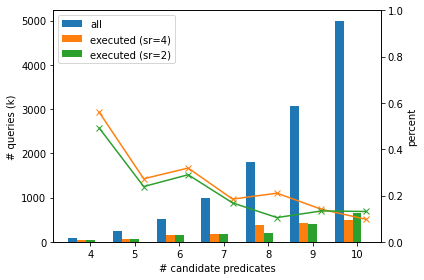

In [5]:
# How many queries are pruned
# sampling_rate 4
# candidate predicates 10
executed_queries_sr_4 = np.array([51984, 63464, 161719, 183853, 379721, 432612, 485503]) / 1000
executed_queries_sr_2 = np.array([45646, 55615, 147017, 167473, 189156, 410548, 652532]) / 1000
all_queries = np.array([92946, 232919, 507364, 996411, 1807238, 3078031, 4981944]) / 1000
percentage_sr_4 = executed_queries_sr_4 / all_queries 
percentage_sr_2 = executed_queries_sr_2 / all_queries 
n_candidate_pred = [4, 5, 6, 7, 8, 9, 10]

x = np.arange(len(n_candidate_pred))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(x - 2*width, all_queries, width, label='all')
ax.bar(x-width, executed_queries_sr_4, width, label='executed (sr=4)')
ax.bar(x, executed_queries_sr_2, width, label='executed (sr=2)')
ax2.plot(x+width, percentage_sr_4, marker="x", color="tab:orange", label='percent')
ax2.plot(x+width, percentage_sr_2, marker="x", color="tab:green", label='percent')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# queries (k)')
ax2.set_ylabel('percent')
ax.set_xlabel('# candidate predicates')
ax.set_xticks(x, n_candidate_pred)
# ax.set_yscale('log')
ax2.set_ylim(bottom=0, top=1)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()